<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-/blob/master/Time_Series_Analysis_With_Univariant_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
from zipfile import ZipFile

In [9]:
with ZipFile('/content/1778_3076_bundle_archive.zip',mode='r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv')

In [11]:
data.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [12]:
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv')

In [13]:
data.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [14]:
data.rename(columns={'Sales of shampoo over a three year period':'Actual Sales'},inplace=True)
data.head()

,Month,Actual Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [15]:
data.isnull().sum()

Month           0
Actual Sales    1
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.set_index(data['Month'],inplace=True)

In [19]:
data.drop(columns=['Month'],inplace=True)

In [20]:
data.describe()

,Actual Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [21]:
data.shape

(36, 1)

In [22]:
data.dtypes

Actual Sales    float64
dtype: object

# Data Visualization.

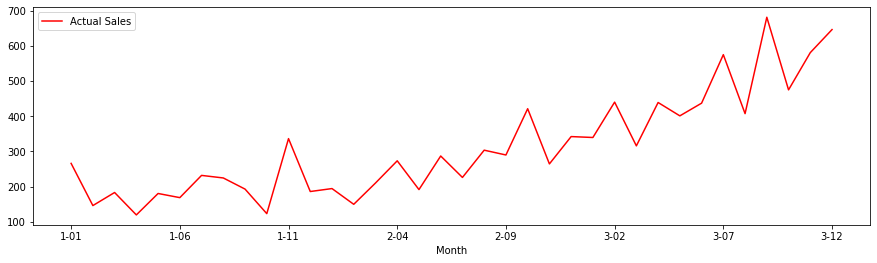

In [23]:
data.plot(kind='line',figsize=(15,4),color='r',legend=True)
plt.show()

Here,we can see the data is not stationary,because there is some trend is avalible so in order to do the time series we need the stationary data.

In [24]:
#Checking the rolling data so that we will get the better understanding of the data.
rolling_data = data.rolling(window=10).mean()

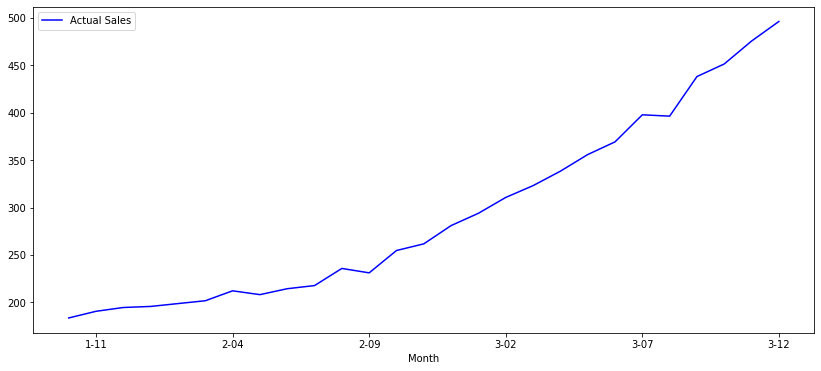

In [25]:
rolling_data.plot(kind='line',legend='20 days Rooling data',color='b',figsize=(14,6))
plt.show()

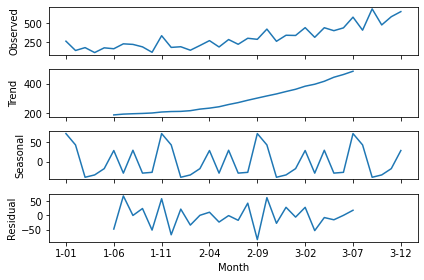

In [26]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data['Actual Sales'], model='additive',freq=10)
decomposition.plot()
plt.show()

Without any noise we have got the rooling data with 10 days that is showing what kind of average trend is avalible inside the data.

# Unnderstand the Stationary and non-stationary with proof.

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
test_result = adfuller(data['Actual Sales'])

In [29]:
adf_score,pvalues,usedlog,nobs,critical_values,icbest=test_result

In [30]:
def is_stationary(p_values):
  if p_values >=0.05:
    print('This is showing the data is strongly accepting the null hypothesis.That means the data is not stationary.')
  else:
    print('This is showing the data is strongly accepting the Alternative  hypothesis.That means the data is stationary.')


In [31]:
is_stationary(pvalues)

This is showing the data is strongly accepting the null hypothesis.That means the data is not stationary.


# Convert the non-Stationary data to Stationary data.

In [32]:
data['Forecast Sales']  = data['Actual Sales'].shift(1)

In [33]:
data['Forecast Sales'].head()

Month
1-01      NaN
1-02    266.0
1-03    145.9
1-04    183.1
1-05    119.3
Name: Forecast Sales, dtype: float64

In [37]:
data.head()

,Actual Sales,Forecast Sales,Seasonal First Difference
Month,,,
1-01,266.0,NaN,NaN
1-02,145.9,266.0,-120.1
1-03,183.1,145.9,37.2
1-04,119.3,183.1,-63.8
1-05,180.3,119.3,61.0


In [38]:
data['Seasonal First Difference'] = data['Actual Sales'] - data['Actual Sales'].shift(1)

In [39]:
data['Seasonal First Difference'].head()

Month
1-01      NaN
1-02   -120.1
1-03     37.2
1-04    -63.8
1-05     61.0
Name: Seasonal First Difference, dtype: float64

In [50]:
data.head()

,Actual Sales,Forecast Sales,Seasonal First Difference
Month,,,
1-02,145.9,266.0,-120.1
1-03,183.1,145.9,37.2
1-04,119.3,183.1,-63.8
1-05,180.3,119.3,61.0
1-06,168.5,180.3,-11.8


In [51]:
data.dropna(inplace=True)

In [52]:
test_forecast_result = adfuller(data['Seasonal First Difference'])

In [53]:
adf_score,p_values,usedlog,nobs,critical_values,icbest=test_forecast_result

In [54]:
is_stationary(p_values)

This is showing the data is strongly accepting the Alternative  hypothesis.That means the data is stationary.


# Checking the base model MSE(Mean Squared Error).

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
MSE_base_model = mean_squared_error(data['Actual Sales'],data['Forecast Sales'])

In [57]:
MSE_base_model

11715.388285714285

In [58]:
np.sqrt(MSE_base_model)

108.23764726616282

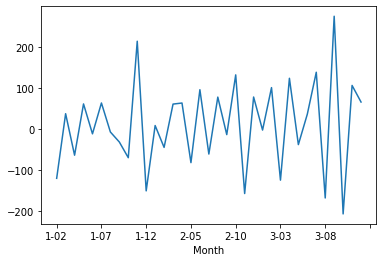

In [59]:
data['Seasonal First Difference'].plot()
plt.show()

# NOW GO THE ARIMA
 Auto-Regressive model in order to create the forecasting for that we want the P,D and Q parameter so that we can get the prediction with the less MSE.

In [60]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

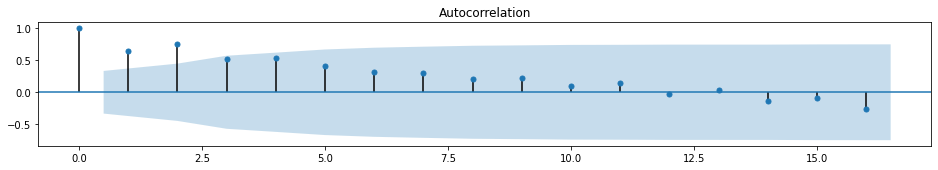

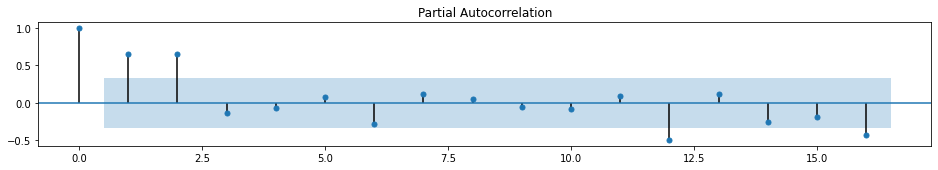

In [61]:
plt.figure(figsize=(16,5))
ax1=plt.subplot(211)
plot_acf(data['Forecast Sales'],ax=ax1)
plt.show()
plt.figure(figsize=(16,5))
ax2=plt.subplot(212)
plot_pacf(data['Forecast Sales'],ax=ax2)
plt.show()

  From the above we can see the there is the autocorrelation with lag.
  Here we can see the p is detemnine with the help of autocorrelation.we are going to take that 1 and for the Q we are using the Partial Auto-correlation which is here are taking 1 because all the value of lag giving the some better autocorrelation than others.One more thing that is D here we taking the D as 1.
  

In [62]:
from statsmodels.tsa.arima_model import ARIMA

In [63]:
len(data['Actual Sales'])

35

In [64]:
train_Sales = data['Actual Sales'][:25]
test_sales  = data['Actual Sales'][20:]

In [65]:
Arima_model = ARIMA(train_Sales,order=(1,1,1))
fit_model = Arima_model.fit()

In [66]:
fit_model.aic    #lesser the aic better the model.

271.2930031621556

In [67]:
Forecasting = fit_model.forecast(steps=len(test_sales))[0]

In [68]:
Forecasting

array([352.23309473, 395.21131208, 392.93332314, 406.27256927,
       414.22254283, 424.03227317, 433.20022946, 442.5896523 ,
       451.90265038, 461.24202149, 470.57229167, 479.90570244,
       489.23802943, 498.57073043, 507.90330236])

# Mean squred error measurement.

In [73]:
Base_model_MSE=np.sqrt(mean_squared_error(test_sales,Forecasting))
Base_model_MSE

92.17521547088572

From the above our base model perform not best rather than the ARIMA model because the MSE in ARIMA model is greater than the Base model.

# Lets do SARIMA

Becasue the atual series having some trends so go for the SARIMA.

In [97]:
import statsmodels.api as sm

In [98]:
serima_model = sm.tsa.statespace.SARIMAX(train_Sales,order=(1,1,1),seasonal_order=(1,1,1,1))
serima_model_fit = serima_model.fit()

In [104]:
serima_forecasting = serima_model_fit.forecast(steps=len(test_sales))

In [101]:
MSE_serima = np.sqrt(mean_squared_error(test_sales,serima_forecasting))

In [102]:
MSE_serima

90.22166513672595

Since we are getting the MSE lesser tahn the base_model so we are going to do the Hyperparameter tunning in order to obtain the optimal P,D and Q values.

In [78]:
p_values = range(0,5)
q_values = range(0,3)
d_values = range(0,5)

In [81]:
for p in p_values:
  for q in q_values:
    for d in d_values:
      order = (p,d,q)
      train,test = data['Actual Sales'][:25],data['Actual Sales'][25:]
      predictions = list()
      for i in range(len(test)):
        try:
          model = ARIMA(train,order)
          model_fit = model.fit()
          prediction = model_fit.forecast()[0]
          predictions.append(prediction)
          error = np.sqrt(mean_squared_error(test,predictions))
          print(order, ' and ',error)
        except:
          continue

(0, 0, 0)  and  279.06338530161923
(0, 1, 0)  and  120.9338507919148
(0, 2, 0)  and  122.44446659917362
(0, 0, 1)  and  241.65523108246276
(0, 1, 1)  and  181.16872760094884
(0, 2, 1)  and  117.44910965217129
(0, 0, 2)  and  194.13037624302845
(0, 1, 2)  and  195.62820298231455
(1, 0, 0)  and  194.7359316684793
(1, 1, 0)  and  153.9158803031757
(1, 2, 0)  and  117.00848879718603
(1, 0, 1)  and  279.06647449432296
(1, 1, 1)  and  182.939119663154
(1, 1, 2)  and  205.1009850890506
(2, 0, 0)  and  184.0380700644187
(2, 1, 0)  and  160.8857127792145
(2, 2, 0)  and  116.99316928709223
(2, 0, 1)  and  192.25722166648873
(2, 1, 1)  and  193.1938003549667
(3, 0, 0)  and  185.38117707994988
(3, 1, 0)  and  195.9330627469046
(3, 2, 0)  and  173.79577637192918
(3, 0, 1)  and  174.22147447983113
(3, 1, 1)  and  189.5793728566549
(3, 2, 1)  and  178.71565777651168
(3, 1, 2)  and  169.37262858891748
(4, 0, 0)  and  139.0815408312692
(4, 1, 0)  and  182.6392657710364
(4, 2, 0)  and  170.3901648291927

  Since, we are not getting the optimal P,Q,R for the data but we got already optimal vaues 1,1,1.Hyper-parameter tunning is working fine here.

We will see the forecasting and actual data visualizations.






In [109]:
ARIMA_prediction_dataframe = pd.DataFrame(dict(Actual=test_sales,ARIMA_Forecated=Forecasting))

In [110]:
ARIMA_prediction_dataframe.head()

,Actual,ARIMA_Forecated
Month,,
2-10,421.6,352.233095
2-11,264.5,395.211312
2-12,342.3,392.933323
3-01,339.7,406.272569
3-02,440.4,414.222543


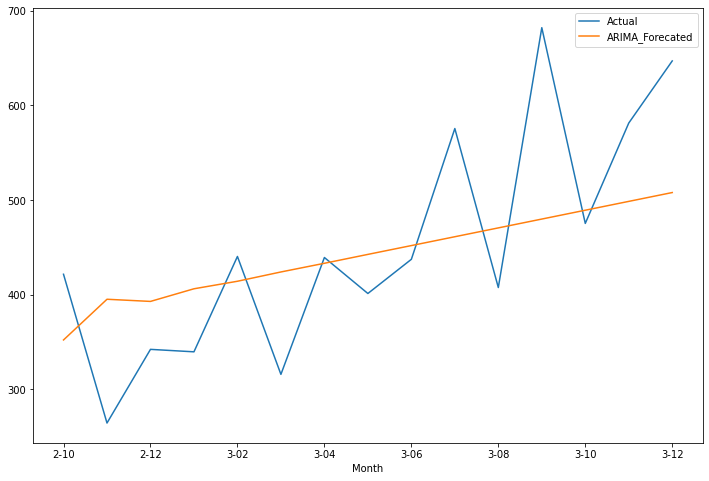

In [111]:
ARIMA_prediction_dataframe.plot(figsize=(12,8))
plt.show()
#It auto_regression Moving avarage prediction.Since it is considering avarage.

# SERIMAX data visualization.

In [116]:
serima_model = sm.tsa.statespace.SARIMAX( data['Actual Sales'],order=(1,1,1),seasonal_order=(1,1,1,1))
serima_model_fit = serima_model.fit()

In [124]:
forecast = serima_model_fit.predict(start = 20,end =34,dynamic=True)

In [125]:
forecast

Month
2-10    286.174336
2-11    306.048980
2-12    309.773244
3-01    321.425036
3-02    329.654458
3-03    339.263236
3-04    348.339415
3-05    357.615295
3-06    366.817877
3-07    376.046930
3-08    385.266544
3-09    394.489489
3-10    403.711269
3-11    412.933453
3-12    422.155498
dtype: float64

In [126]:
data['Serima Forecast'] = forecast

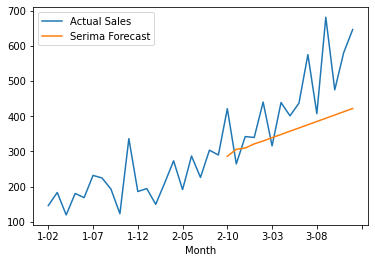

In [128]:
data[['Actual Sales','Serima Forecast']].plot()

Thank You !!